<a href="https://colab.research.google.com/github/PatrickRuan/DL-CVMarathon/blob/master/homework/Day008_sobel_gaussian_blur_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 作業

實作模糊與邊緣檢測

- 透過 Gaussian Filter 實作模糊操作
- 透過 Sobel Filter 實作邊緣檢測

In [1]:
import matplotlib.pyplot as plt
import time
import os
from google.colab import drive
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
drive.mount('/content/drive')

!cp -r drive/'My Drive'/教學/發布/23_CV/Data_Day1/ .
!mv Data_Day1 data

img = cv2.imread('data/lena.png')

Mounted at /content/drive


## 邊緣檢測

### 比較 Sobel 如果在 uint8 的情況下做會 overflow 的狀況

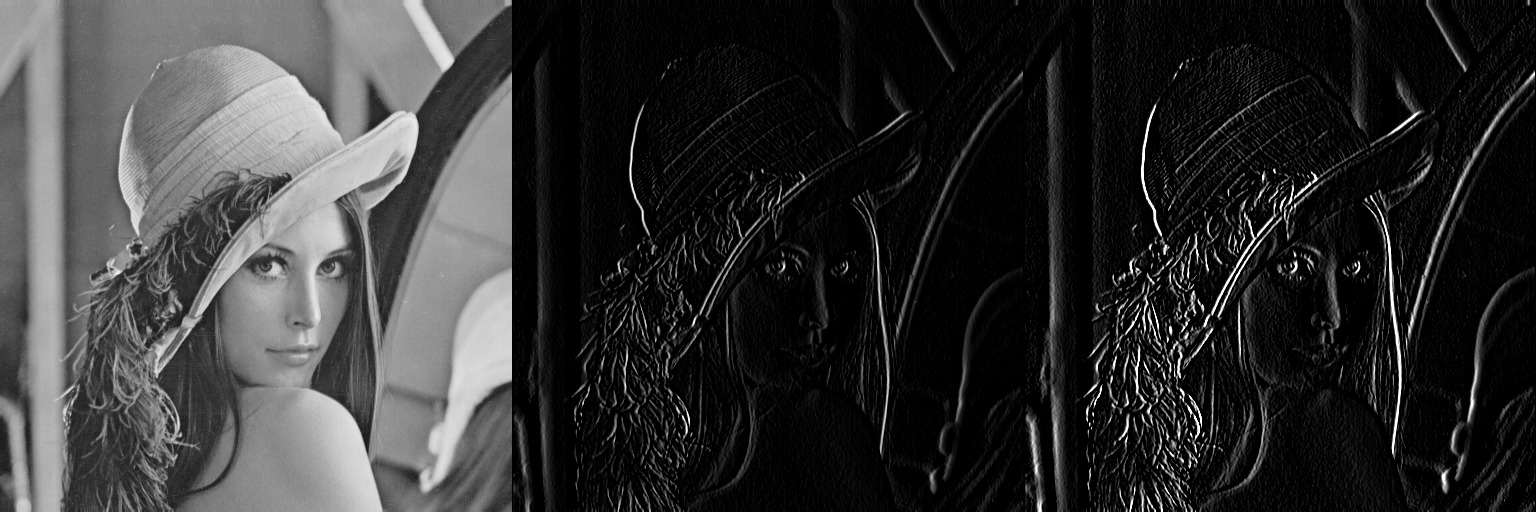

In [2]:
# 轉為灰階圖片
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 對 x 方向以包含負數的資料格式 (cv2.CV_16S) 進行 Sobel 邊緣檢測
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16S, dx=1, dy=0, ksize=3)


# 對 x 方向依照比例縮放到所有數值都是非負整數
img_sobel_x = cv2.Sobel(img_grey, cv2.CV_16U , dx=1, dy=0, ksize=3, scale = 0.5)

# 對 x 方向直接以非負整數的資料格式 (uint8) 進行 Sobel 邊緣檢測
img_sobel_x_uint8 = cv2.Sobel(img_grey, cv2.CV_8U, dx=1, dy=0, ksize=3)


#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_x_uint8))
cv2_imshow(img_show)


### 比較一次與兩次計算偏微分的結果

In [ ]:
img_grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 求一次導數取得邊緣檢測結果
img_sobel_x = 

# 求二次導數取得邊緣檢測結果
img_sobel_xx = 

#　組合 + 顯示圖片
img_show = np.hstack((img_grey, img_sobel_x, img_sobel_xx))
while True:
    cv2.imshow('Edge Detection', img_show)
    k = cv2.waitKey(0)
    if k == 27:
        cv2.destroyAllWindows()
        break